In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

In [2]:
df = pd.read_csv('Resale flat prices based on registration date from Jan-2017 onwards.csv')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
206857,2025-02,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,62 years,1100888.0
206858,2025-04,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,61 years 09 months,988000.0
206859,2025-04,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,61 years 09 months,975000.0
206860,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0


In [3]:
df.describe() #Get a summary of the dataset

,floor_area_sqm,lease_commence_date,resale_price
count,206862.000000,206862.000000,2.068620e+05
mean,96.888982,1996.300016,5.147502e+05
std,24.025878,14.222244,1.812476e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.800000e+05
50%,93.000000,1996.000000,4.830000e+05
75%,112.000000,2011.000000,6.180000e+05
max,366.700000,2021.000000,1.600000e+06


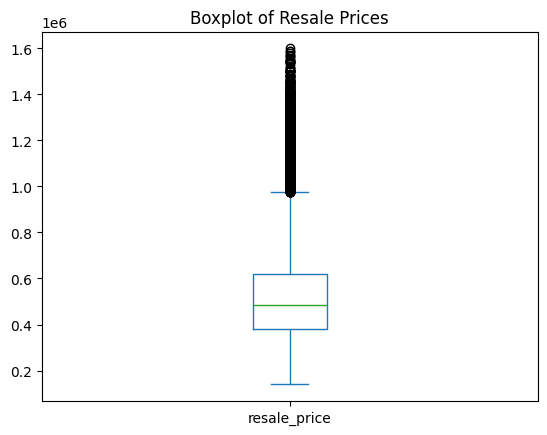

In [4]:
#process blocks as integers, removing the last character if it's a letter
df['block']=df['block'].apply(lambda x: int(x[:-1]) if str(x)[-1].isalpha() else int(x))

df.plot(kind='box', y='resale_price', title='Boxplot of Resale Prices')

plt.show()


Text(0.5, 1.0, 'Histogram showing Distribution of Resale Prices')

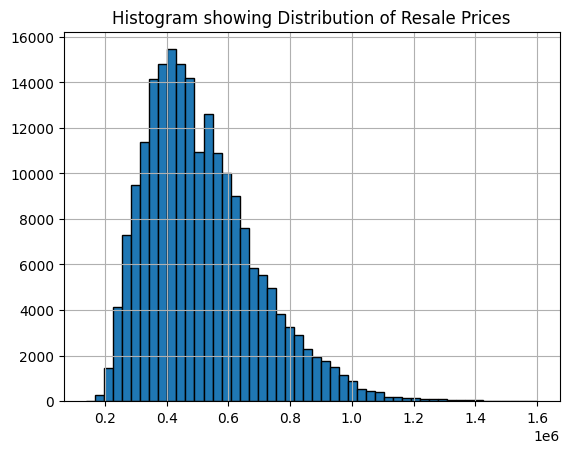

In [5]:
df.hist(column='resale_price', bins=50, edgecolor='black')
plt.title('Histogram showing Distribution of Resale Prices')

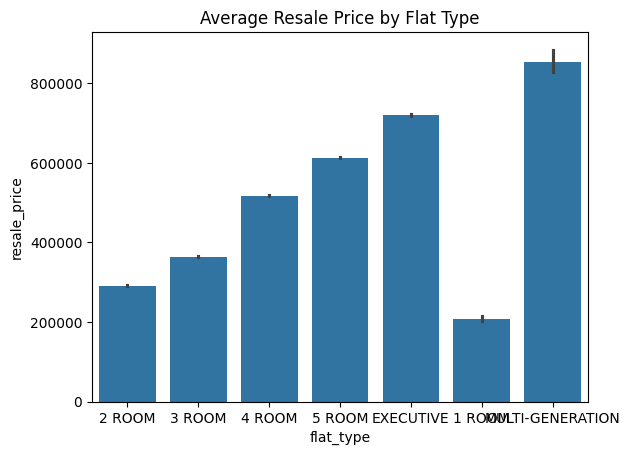

In [6]:
sns.barplot(x='flat_type', y='resale_price', data=df, estimator=np.mean)
plt.title('Average Resale Price by Flat Type')
plt.show()
#Based on the bar plot, the average resale price of 4-room flats is higher than that of 3-room flats, indicating that larger flats tend to have higher resale prices.
#The average resale price of 5-room flats is the highest among the flat types, followed by 4-room flats, and then 3-room flats. This suggests that larger flats tend to have higher resale prices.

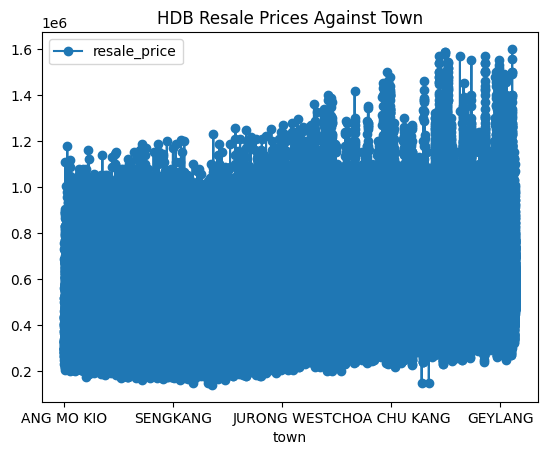

In [7]:
df.plot(x='town', y='resale_price', kind='line', title='HDB Resale Prices Against Town', marker='o')
plt.show()

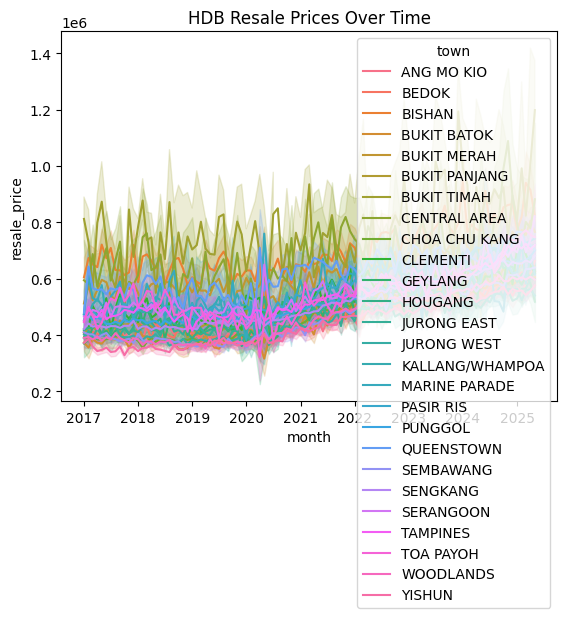

In [8]:

df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
sns.lineplot(df, x='month', y='resale_price', hue='town')
plt.title('HDB Resale Prices Over Time')
plt.show()

In [9]:
df = df.drop(['block','month', 'flat_model', 'street_name', 'remaining_lease'], axis=1) #Drop unnecessary columns, since they are not needed for the analysis

In [10]:
df #Shows the final cleaned dataset with relevant columns for resale price analysis

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,265000.0
...,...,...,...,...,...,...
206857,YISHUN,EXECUTIVE,10 TO 12,146.0,1988,1100888.0
206858,YISHUN,EXECUTIVE,07 TO 09,142.0,1987,988000.0
206859,YISHUN,EXECUTIVE,04 TO 06,146.0,1988,975000.0
206860,YISHUN,EXECUTIVE,04 TO 06,142.0,1988,1000000.0


In [11]:
df = pd.get_dummies(df, columns=['town', 'flat_type', 'storey_range']) #Perform one-hot encoding on categorical variables
df = df.dropna() #Drop rows with missing values

In [12]:
df # Shows the final dataset with one-hot encoded categorical variables

,floor_area_sqm,lease_commence_date,resale_price,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,44.0,1979,232000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,67.0,1978,250000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67.0,1980,262000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,68.0,1980,265000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,67.0,1980,265000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206857,146.0,1988,1100888.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206858,142.0,1987,988000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206859,146.0,1988,975000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
206860,142.0,1988,1000000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
X = df.drop(['resale_price'], axis=1) #x represents the features
y = df[['resale_price']] #y represents the target variable

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=8) # 80% training data, 20% testing data

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #create an instance of LinearRegression class
lr.fit(X_train, y_train) 

LinearRegression()

In [16]:
y_pred = lr.predict(X_test) 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
rfr = RandomForestRegressor(random_state=8) 
rfr.fit(X_train, y_train.values.ravel()) #ravel is used to convert y_train to a 1D array

RandomForestRegressor(random_state=8)

In [19]:
mse = np.mean((y_test - y_pred) ** 2) 
print('Mean Squared Error:', mse.round(2)) # round to 2 decimal places

Mean Squared Error: 9029332641.84


In [20]:
mae = np.mean(np.abs(y_test - y_pred)) 
print(f'Mean Absolute Error:', mae.round(2)) # round to 2 decimal places

Mean Absolute Error: 75591.31


In [21]:
#Hyperparameter tuning using Randomized Search
from sklearn.model_selection import RandomizedSearchCV
param_randomised_search = {
    'max_depth': [5, None],
    'n_estimators': [50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

randomized_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_randomised_search, n_iter=5,cv=5,verbose=1,random_state=8,n_jobs=-1)
randomized_search.fit(X_train, y_train.values.ravel()) #ravel method is used to convert y_train to a 1D array

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=8),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=8, verbose=1)

In [22]:
print("Best Parameters:", randomized_search.best_params_)
print("Best Cross-Validation Score:", randomized_search.best_score_.round(3)) # Round to 3 decimal places 

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best Cross-Validation Score: 0.802


In [23]:
mse = np.mean((y_test.values.ravel() - randomized_search.predict(X_test)) ** 2) 
print('Mean Squared Error after Randomized Search:', mse.round(2)) 

Mean Squared Error after Randomized Search: 6492700760.88


In [24]:
mae = np.mean(np.abs(y_test.values.ravel() - randomized_search.predict(X_test))) 
print(f'Mean Absolute Error after Randomized Search:', mae.round(2)) 

Mean Absolute Error after Randomized Search: 63929.16


In [25]:
#Compare performance of the model after randomized search with training score
#Determines whether the model is overfitted, underfitted, or well-fitted
#If training score is higher than the cross-validation score, the model is overfitted

print("Best Cross-Validation Score:", randomized_search.best_score_.round(3)) # Round to 3 decimal places
print("Training Score:", round(randomized_search.best_estimator_.score(X_train, y_train), 3)) # Round to 3 decimal places

Best Cross-Validation Score: 0.802
Training Score: 0.853


In [26]:
new_df = pd.DataFrame({
    'town': ['BEDOK'],
    'flat_type': ['4 ROOM'],
    'storey_range': ['01 TO 04'],
    'floor_area_sqm': [100],
    'lease_commence_date': [1990]   
})
new_df = pd.get_dummies(new_df, columns=['town', 'flat_type', 'storey_range'])  # Ensure new_df has the same dummies as training data
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)  # Align columns with X_train, 0 means that if a column is not present in new_df, it will be filled with 0
new_df


,floor_area_sqm,lease_commence_date,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,100,1990,0,True,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
predicted_price = rfr.predict(new_df) # Predict resale price with decision tree model
print(f"The predicted resale price is ${predicted_price[0]:.2f}") # Round to 2 decimal places

The predicted resale price is $592532.76


In [28]:
df.columns.drop(['resale_price']) #drop resale price column since it is not a feature

Index(['floor_area_sqm', 'lease_commence_date', 'town_ANG MO KIO',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'storey_range_01 TO 03',
       'storey_range_04 TO 06', 'storey_range_07 TO 09',
       'storey_range_10 TO 12', 'storey_range_13 TO 15',
       'storey_range_16 TO 18', 'storey_range_19 TO 21',
       'storey_range_22 TO 24', 'storey_range_25 TO

In [29]:
model = GradientBoostingRegressor()  # Create an instance of GradientBoostingRegressor
model.fit(X_train, y_train.values.ravel())  # helps to flatten y_train to 1D array for fitting

GradientBoostingRegressor()

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from tabulate import tabulate # Beautifully format the output table

models = {
    'Linear Regression': lr,
    'Random Forest Regressor': rfr,
    'Gradient Boosting Regressor': model
} # Creates a dictionary of models for evaluation

table_data = [] # Array to hold the results for each model

for name, mdl in models.items(): # For loop through each model in the dictionary, mdl to avoid confusion with model variable
    predictions = mdl.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mse_val = mean_squared_error(y_test, predictions)
    mae_val = mean_absolute_error(y_test, predictions)
    table_data.append([name, f"{r2:.2f}", f"{mse_val:.2f}", f"{mae_val:.2f}"]) #.2f formats the values to 2 decimal places
    
headers = ["Model", "R² Score", "MSE", "MAE"] # Regression metrics headers
print(tabulate(table_data, headers=headers, tablefmt="grid")) # grid format for better readability

+-----------------------------+------------+-------------+---------+
| Model                       |   R² Score |         MSE |     MAE |
+=============================+============+=============+=========+
| Linear Regression           |       0.73 | 9.02933e+09 | 75591.3 |
+-----------------------------+------------+-------------+---------+
| Random Forest Regressor     |       0.8  | 6.59454e+09 | 64161.2 |
+-----------------------------+------------+-------------+---------+
| Gradient Boosting Regressor |       0.74 | 8.63918e+09 | 72955.9 |
+-----------------------------+------------+-------------+---------+


In [31]:
#Feature Importance
importance = model.feature_importances_ # From gradient boosting model
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance.round(4)}) #create a DataFrame with feature names and their importance, rounded to 3 significant figures
importance_df = importance_df.sort_values(by='Importance', ascending=False) #sort the DataFrame by importance in descending order
importance_df 

,Feature,Importance
0,floor_area_sqm,0.5151
1,lease_commence_date,0.1894
6,town_BUKIT MERAH,0.0422
31,flat_type_4 ROOM,0.0362
20,town_QUEENSTOWN,0.0353
4,town_BISHAN,0.0211
9,town_CENTRAL AREA,0.0196
16,town_KALLANG/WHAMPOA,0.0182
25,town_TOA PAYOH,0.0179
26,town_WOODLANDS,0.0105


In [32]:
joblib.dump(model, 'model.pkl')  # Save the model to a file

['model.pkl']